In [1]:
import IPython
import os
os.system("ls [a-z]*.md | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files

['abrelsfo', 'acliff', 'ahranov', 'bfriend2', 'cbleker', 'cfabian', 'cpayne30', 'cshurtle', 'dagrawa2', 'dlowe7', 'dmagsby', 'dpak1', 'drao', 'eleffler', 'gjones2', 'gliso', 'hchoi6', 'jadams45', 'jande118', 'jcate6', 'jmill225', 'jswart1', 'jzhao25', 'kdawes', 'kgardn15', 'kwang40', 'kye2', 'lmills9', 'miblake6', 'mmacneil', 'ngreen11', 'nshah7', 'pleffler', 'prq856', 'rriedel1', 'sbeztch1', 'smarcus5', 'snorem1', 'tricha32', 'wck942', 'wharri36', 'wileliff', 'wvaugha2', 'ztrzil']


In [2]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  line = a.read()
  documents .append(line)
  text = text + " " + line
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [3]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,abrelsfo,acliff,ahranov,bfriend2,cbleker,cfabian,cpayne30,cshurtle,dagrawa2,dlowe7,...,rriedel1,sbeztch1,smarcus5,snorem1,tricha32,wck942,wharri36,wileliff,wvaugha2,ztrzil
abrelsfo,1.000,0.066,0.141,0.068,0.112,0.090,0.011,0.064,0.114,0.145,...,0.137,0.088,0.069,0.004,0.094,0.112,0.044,0.081,0.015,0.086
acliff,0.066,1.000,0.128,0.087,0.256,0.145,0.083,0.097,0.176,0.073,...,0.110,0.108,0.103,0.065,0.092,0.071,0.225,0.164,0.053,0.069
ahranov,0.141,0.128,1.000,0.101,0.115,0.120,0.161,0.083,0.139,0.078,...,0.111,0.107,0.105,0.124,0.062,0.192,0.128,0.174,0.087,0.201
bfriend2,0.068,0.087,0.101,1.000,0.107,0.138,0.047,0.055,0.089,0.056,...,0.060,0.114,0.094,0.048,0.075,0.142,0.095,0.052,0.048,0.099
cbleker,0.112,0.256,0.115,0.107,1.000,0.153,0.076,0.097,0.198,0.132,...,0.068,0.163,0.133,0.118,0.179,0.160,0.116,0.145,0.098,0.120
cfabian,0.090,0.145,0.120,0.138,0.153,1.000,0.029,0.068,0.146,0.114,...,0.162,0.255,0.135,0.039,0.184,0.121,0.081,0.078,0.119,0.113
cpayne30,0.011,0.083,0.161,0.047,0.076,0.029,1.000,0.060,0.057,0.066,...,0.139,0.049,0.033,0.058,0.049,0.091,0.176,0.244,0.015,0.197
cshurtle,0.064,0.097,0.083,0.055,0.097,0.068,0.060,1.000,0.061,0.139,...,0.156,0.079,0.068,0.025,0.088,0.102,0.065,0.074,0.053,0.082
dagrawa2,0.114,0.176,0.139,0.089,0.198,0.146,0.057,0.061,1.000,0.122,...,0.067,0.152,0.134,0.055,0.118,0.129,0.126,0.163,0.071,0.104
dlowe7,0.145,0.073,0.078,0.056,0.132,0.114,0.066,0.139,0.122,1.000,...,0.089,0.145,0.108,0.061,0.179,0.108,0.091,0.131,0.066,0.107


In [4]:
import networkx as nx
import json

# use these distances to create a graph by cutting links below .21 
nxg = nx.Graph()
for i in range(len(files)-1):
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):
        if df.iloc[i,j] > maxVal: 
            maxVal = df.iloc[i,j]
            jMax = j
        if (df.iloc[i,j] > .21):
            nLinks += 1
            nxg.add_edge(flab[i], flab[j], weight=df.iloc[i,j],color='r')
    if nLinks == 0:
        nxg.add_edge(flab[i], flab[jMax], weight=df.iloc[i,jMax],color='r')
        
print (nxg.nodes())

['wileliff', 'kdawes', 'kwang40', 'smarcus5', 'nshah7', 'miblake6', 'wharri36', 'ngreen11', 'wvaugha2', 'prq856', 'cfabian', 'snorem1', 'cpayne30', 'kye2', 'ztrzil', 'drao', 'cbleker', 'sbeztch1', 'dpak1', 'jadams45', 'dlowe7', 'gjones2', 'tricha32', 'dmagsby', 'jzhao25', 'jcate6', 'dagrawa2', 'pleffler', 'ahranov', 'bfriend2', 'gliso', 'rriedel1', 'lmills9', 'acliff', 'jande118', 'wck942', 'mmacneil', 'cshurtle', 'hchoi6', 'eleffler', 'jswart1', 'kgardn15', 'jmill225', 'abrelsfo']


lmills9 sbeztch1 0.701419977774
My name is Luke Mills and I am a senior studying computer science. My primary interests involve software engineering, data science, and cryptocurrencies.

My name is Saeed Beztchi and am currently a senior in Computer Science and minoring in Cybersecurity. My main interests involve crytography and network security.



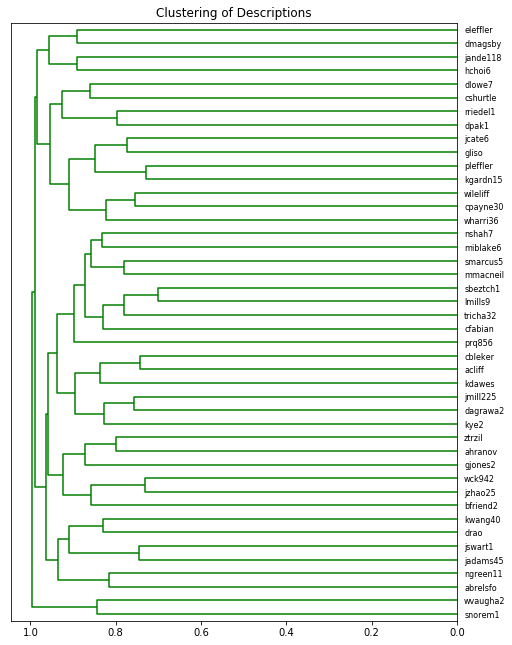

In [5]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)   
#dist ij = dist2 [i*(n-1)+j] and i < j
dist1 = pdist(tfidf.A, 'cosine')
minVal = min(dist1)
ij = np.where(dist1==minVal)[0][0]
for i in range(0,43):
    for j in range (i+1,44):
        ij -= 1
        if ij == 0: 
            break
    else:        
        continue  
    break
print (flab[i] + " " + flab[j+1] + " "+ str (minVal))
a = open (flab[i]+".md")
line = a.read()
print(line)
a = open (flab[j+1]+".md")
line = a.read()
print(line)


# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)
#print (flab[int(linkage_matrix[0][0])] + " " + flab[int(linkage_matrix[0][1])])
# Plot results
fig = plt.figure(1, figsize=(8, 11))
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,
               )
plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")


In [6]:
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)
json.dump(nld, open('students.json','w'))

In [7]:
from IPython.display import IFrame
from IPython.core.display import display
# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.
viz_file = 'files/students.html'
display(IFrame(viz_file, '100%', '600px'))